In [149]:
#SALES PREDICTION ~ IMPORTING CLASSES

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATA EXPLORATION AND DATA CLEANING

In [151]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("/content/advertising.csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [152]:
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [153]:
display(df)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [154]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [155]:
##DATA INSPECTION
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [156]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [157]:
df.isnull().any()


TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

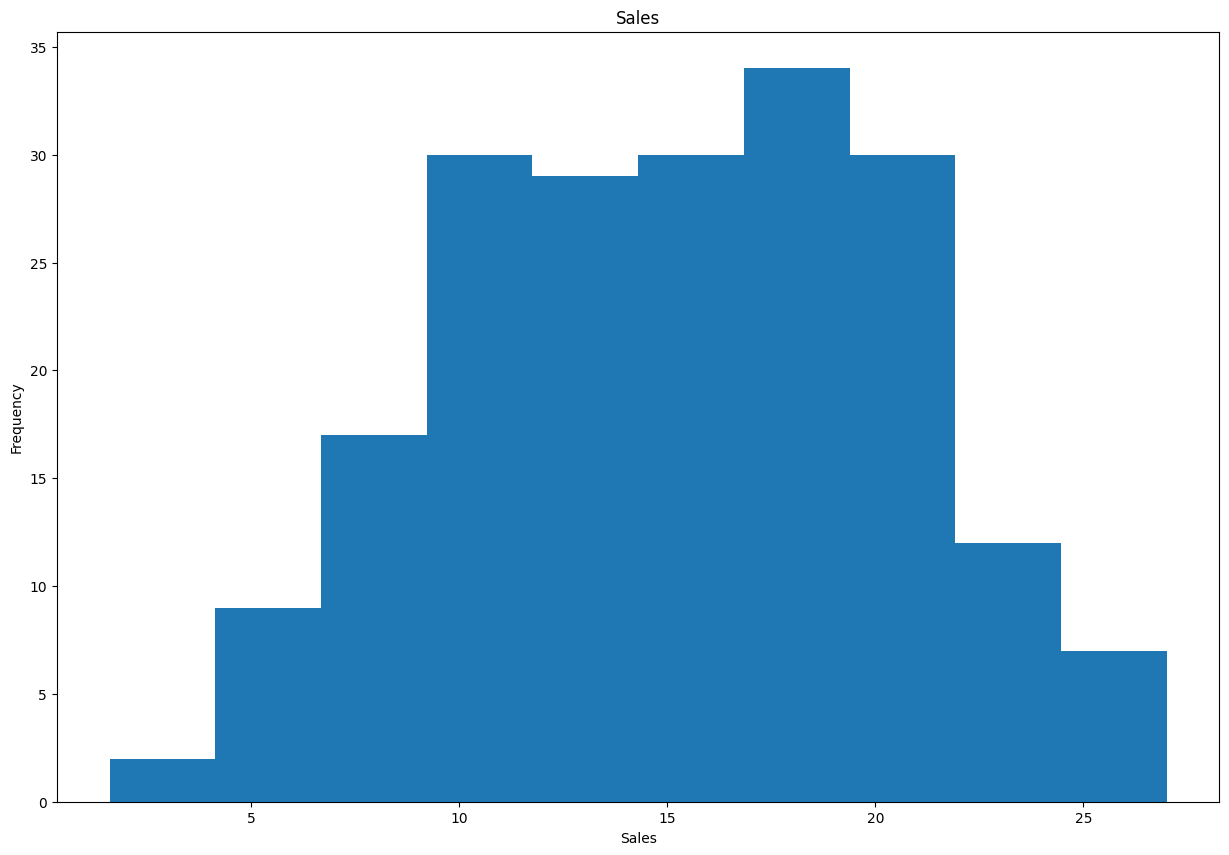

In [158]:
# Generate a histogram of the tenure variable using matplotlib
plt.figure(figsize=(15, 10))
plt.hist(df["Sales"])
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales")
plt.show()

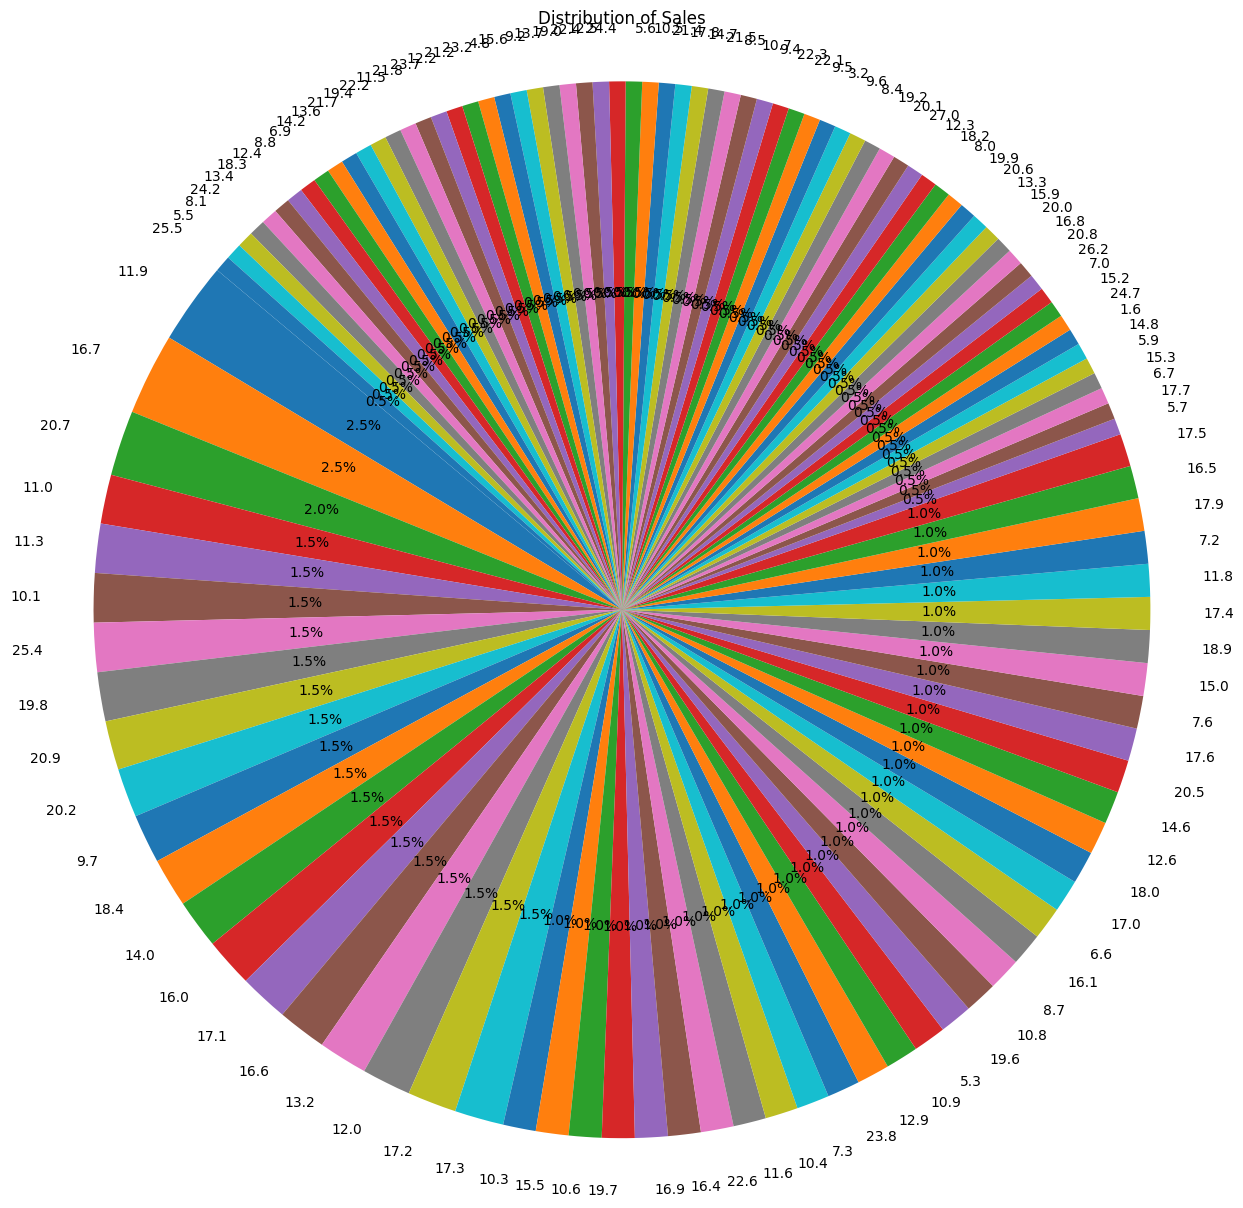

In [159]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['Sales'].value_counts()

# Plot the pie chart
plt.figure(figsize=(15, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

CONSTRUCTION OF A MACHINE LEARNING MODEL - LINEAR REGRESSION MODEL

and has two possible outcomes, such as yes/no, success/failure, or 0/1.

In [160]:
#IMPORTING RELEVANT CLASSES
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
#Use the advertising dataset given in ISLR and analyse the
# relationship between 'TV advertising' and 'sales' using a simple linear regression model.

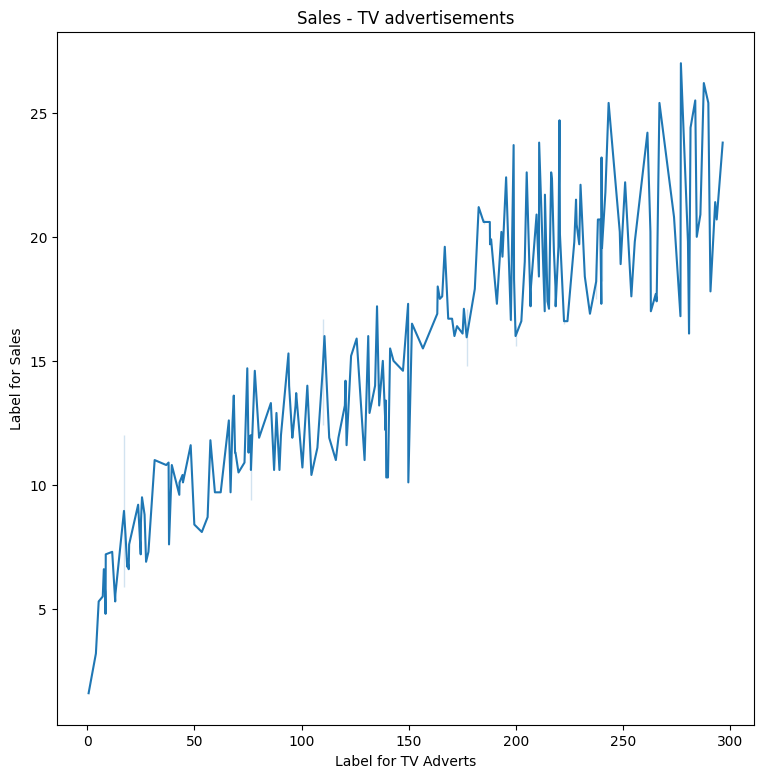

In [162]:
import seaborn as sns

# Plotting using seaborn
plt.figure(figsize=(9, 9))
sns.lineplot(data=df, y='Sales', x='TV')
plt.ylabel('Label for Sales')
plt.xlabel('Label for TV Adverts')
plt.title('Sales - TV advertisements')
plt.show()

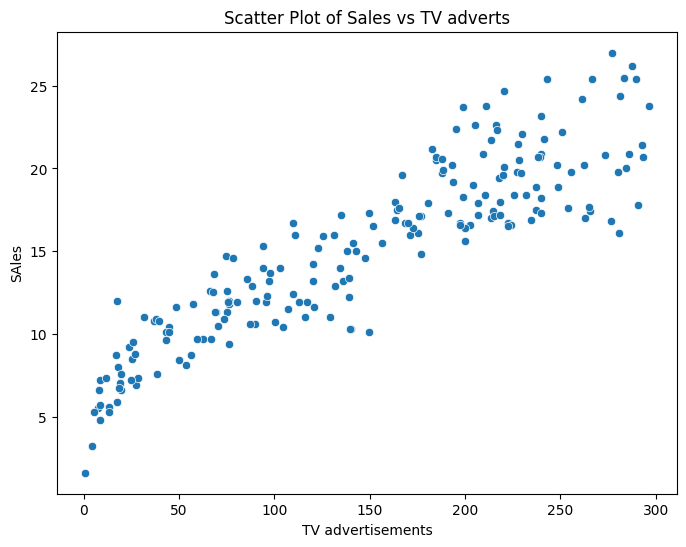

In [163]:
# Plot a scatter plot to visualize the correlation between two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV advertisements')
plt.ylabel('SAles')
plt.title('Scatter Plot of Sales vs TV adverts')
plt.show()

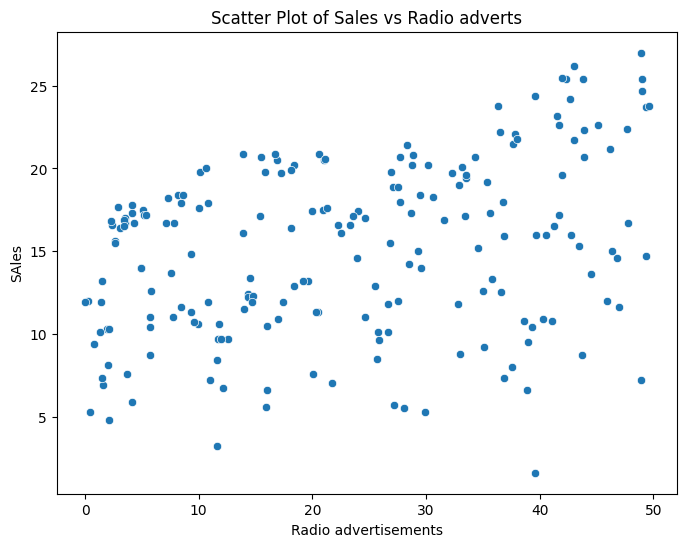

In [164]:
# Plot a scatter plot to visualize the correlation between two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.xlabel('Radio advertisements')
plt.ylabel('SAles')
plt.title('Scatter Plot of Sales vs Radio adverts')
plt.show()

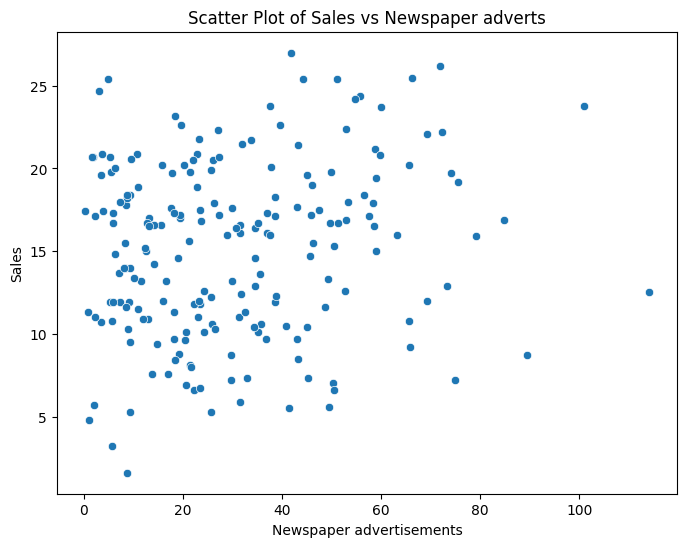

In [165]:
# Plot a scatter plot to visualize the correlation between two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.xlabel('Newspaper advertisements')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales vs Newspaper adverts')
plt.show()

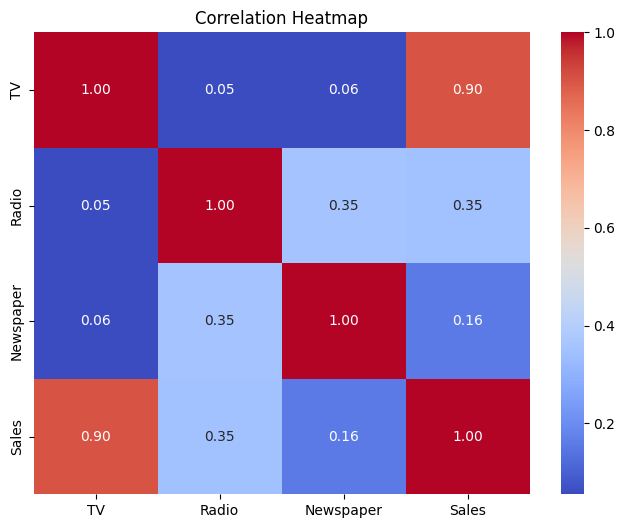

In [166]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [167]:
#BUILDING A LINEAR REGRESSION MODEL
data = df

In [168]:
display(data)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
# Round off the numbers in the 'Rating' column
data['Newspaper'] = df['Newspaper'].round()

In [171]:
# Round off the numbers in the 'Radio' column
data['Radio'] = df['Radio'].round()

In [172]:
# Round off the numbers in the 'Sales' column
data['Sales'] = df['Sales'].round()

In [173]:
# Round off the numbers in the 'TV' column
data['TV'] = data['TV'].round()

In [174]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Sales'])
y = data['Sales']

In [175]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [176]:
# Set up logistic regression model
model = LogisticRegression(max_iter=1000)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [177]:
y_pred = model.predict(X_test)


In [178]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.113194498104894
R-squared: 0.9046421778664555


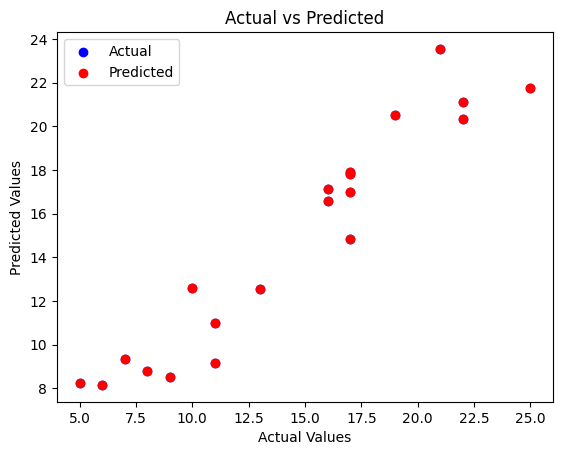

In [185]:
# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c='blue', label='Actual')  # Plot actual values in blue
plt.scatter(y_test, y_pred, c='red', label='Predicted')  # Plot predicted values in red
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()

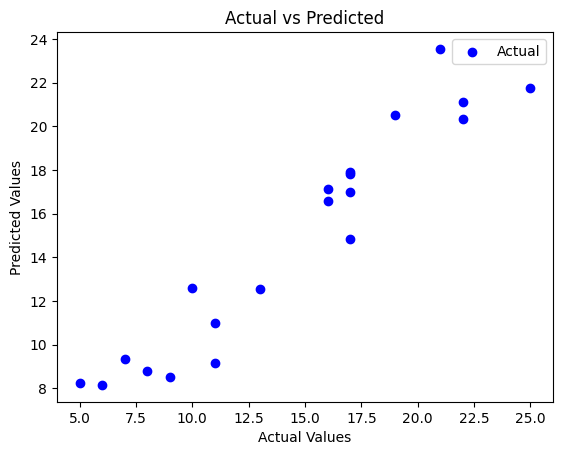

In [184]:
# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c='blue', label='Actual')  # Plot actual values in blue
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()